# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv("C:/Users/JOHGNATAN/OneDrive/Área de Trabalho/Python_Data_Science/base_de_dados_diversos/dados.csv",
                    sep = ',')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Salário mínimo <b>R$ 788,00</b>.



<p> O código analisa a distribuição de renda de uma determinada população e cria um relatório que apresenta a frequência e o percentual de pessoas em cada classe de renda. Para isso, o código define intervalos de renda pré-determinados e atribui rótulos a cada classe. </p>

In [4]:
classes = [dados.Renda.min(),
           2 * 788,
           5 * 788,
           15 * 788,
           25 * 788,
           dados['Renda'].max()]
classes


[0, 1576, 3940, 11820, 19700, 200000]

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

<p>Em seguida, criamos a frequência de renda em cada classe, e um novo conjunto de dados é criado para mostrar o percentual de pessoas em cada classe. </p>

In [6]:
freq = pd.value_counts(pd.cut(x = dados['Renda'],
       bins = classes,
       labels = labels,
       include_lowest = True))
freq

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [7]:
percentual = pd.value_counts(pd.cut(x = dados['Renda'],
                                    bins = classes,
                                    labels = labels,
                                    include_lowest = True), normalize = True)*100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

<p>Por fim, um dataframe é criado para armazenar as informações de frequência e percentual em cada classe de renda, e é utilizado para gerar um relatório final sobre a distribuição de renda da população em questão.</p>

In [11]:

report = pd.concat([freq, percentual], axis = 1)
report.columns = ['Frequência', 'Percentual (%)']

report

,Frequência,Percentual (%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


<AxesSubplot:>

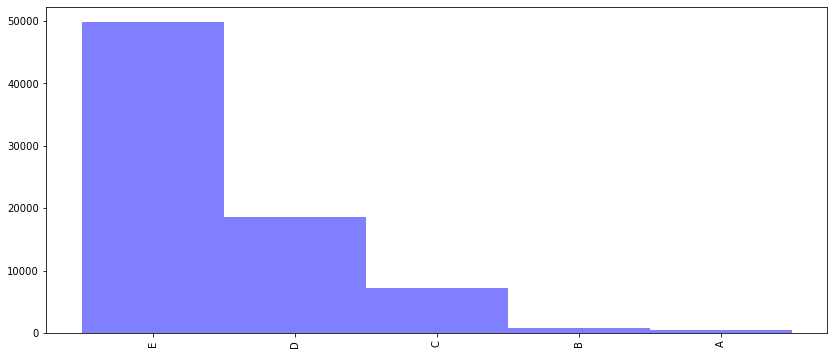

In [177]:
report['Frequência'].plot.bar(width = 1 ,
                              color = 'blue',
                              alpha = 0.5,
                              figsize = (14,6))

<li>O gráfico apresenta a frequência de pessoas em cada classe de renda. O objetivo é apresentar visualmente a distribuição de renda da população em questão.</li>



### Histograma para as variáveis QUANTITATIVAS de nosso dataset


<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros'>

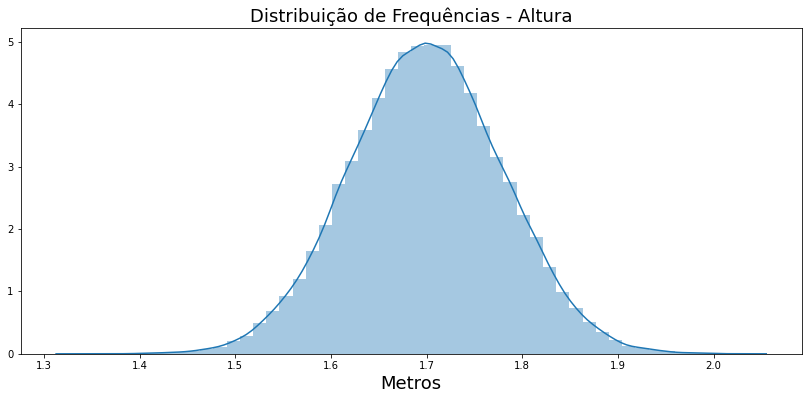

In [178]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 18)
ax

<AxesSubplot:title={'center':'Distribuição de Frequência - Idade'}, xlabel='Anos'>

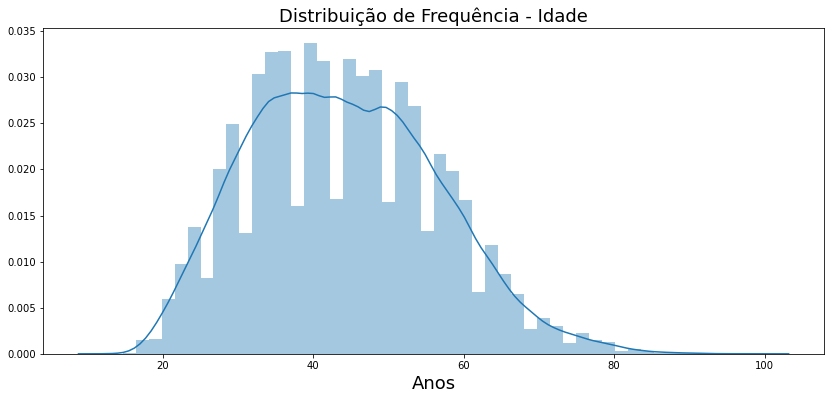

In [179]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequência - Idade', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 18)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Renda'}, xlabel='R$'>

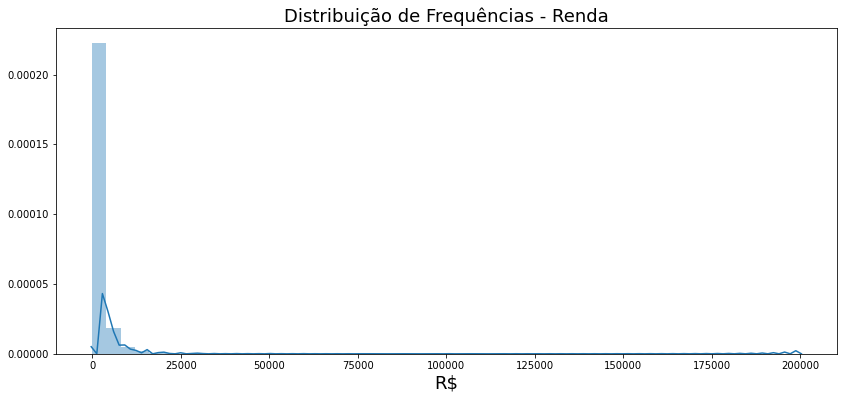

In [180]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 18)
ax

### Para a variável RENDA, vamos criar um histograma com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:title={'center':'Distribuição de Frequências - RENDA - Pessoas com renda até R$20.000,00'}, xlabel='R$'>

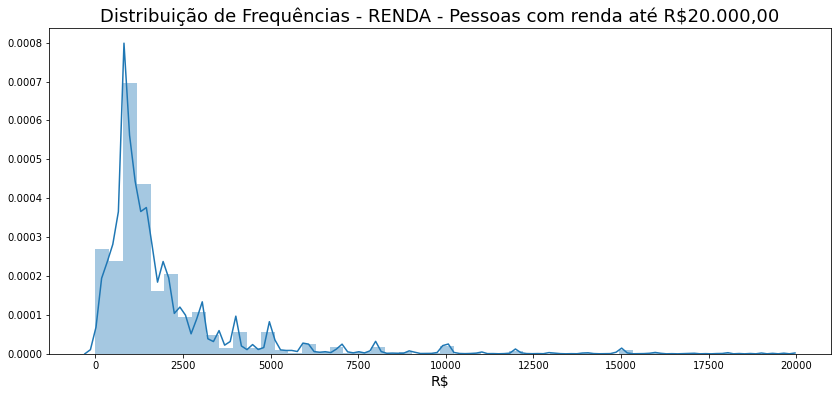

In [14]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - RENDA - Pessoas com renda até R$20.000,00', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

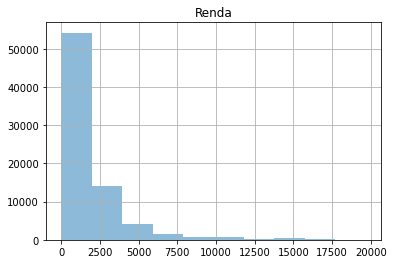

In [16]:
selecao = (dados.Renda < 20000)
hist_de_ate_20 = dados[selecao]
histograma = hist_de_ate_20.hist(['Renda'], alpha = 0.5)

<li>O código define quatro dicionários que serão utilizados para mapear valores de variáveis categóricas em seus respectivos rótulos. O primeiro dicionário, "sexo", associa o valor <strong>0</strong> a <strong>"Masculino"</strong> e o valor <strong>1</strong> a <strong>"Feminino"</strong>. O segundo dicionário, "cor", mapeia os valores <strong>0, 2, 4, 6</strong> e <strong>8</strong> em <strong>"Indígena", "Branca", "Preta", "Amarela"</strong> e <strong>"Parda"</strong>, respectivamente. O terceiro dicionário, <strong>"anos_de_estudo"</strong>, associa os números de <strong>1 a 17</strong> a descrições de anos de estudo. Por fim, o dicionário <strong>"UF"</strong> mapeia os valores dos códigos das unidades federativas do Brasil em seus respectivos nomes. A utilização desses dicionários é útil para dar significado aos valores categóricos em um conjunto de dados e para facilitar a análise e interpretação dos resultados.</li>

In [19]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

<li>Vamos analisar a distribuição de renda e a frequência e percentual de pessoas em diferentes faixas de renda, bem como a distribuição da cor da pele entre homens e mulheres. A análise foi feita por meio de tabelas de frequência e percentual.</li>

In [20]:
tabela_freq = pd.crosstab(dados.Sexo, dados['Cor'])
tabela_freq.rename(index = sexo, columns = cor, inplace = True)
tabela_freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [21]:
tabela_percentual = pd.crosstab(dados['Sexo'],
                                dados.Cor,
                                normalize = True)* 100
tabela_percentual.rename(index = sexo, columns = cor, inplace = True)
tabela_percentual.round(2)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


## Análise descritiva para a variável RENDA

### Média aritimética

In [22]:
dados['Renda'].mean()

2000.3831988547631

### Mediana

In [23]:
dados['Renda'].median()

1200.0

### Moda

In [24]:
dados.Renda.mode()[0]

788

### Desvio médio absoluto

In [25]:
dados['Renda'].mad()

1526.4951371644931

### Variância

In [26]:
dados['Renda'].var()

11044906.00622118

### Desvio-padrão

In [27]:
dados.Renda.std()

3323.3877303470294

<p> Estamos analisando a renda máxima, média e mediana de acordo com a cor e o sexo dos entrevistados. A tabela resultante mostra esses valores agregados para cada combinação de cor e sexo.</p>


In [28]:

research_max = pd.crosstab(dados.Cor, dados['Sexo'], aggfunc = ['max','mean','median'], values = dados.Renda)
research_max.rename(columns = sexo, inplace =True)
research_max.rename(index = cor, inplace =True)
research_max


max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0


<li>Nesta análise vamos calcular as medidas de dispersão (Desvio Médio Absoluto - MAD, Variância e Desvio Padrão) da renda por cor e sexo. Os resultados são apresentados em uma tabela, onde as linhas correspondem às diferentes cores e as colunas correspondem aos diferentes sexos.</li>

In [193]:

desvio_med = pd.crosstab(dados.Cor, dados['Sexo'],
                         aggfunc = {'mad','var','std'},
                         values = dados.Renda)
desvio_med.rename(columns = sexo, index = cor, inplace = True)
desvio_med

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

<li>Nesta análise, estamos visualizando um gráfico de caixa que compara a renda de pessoas de diferentes cores e gêneros, mas apenas para aqueles com renda abaixo de R$ 10.000. O gráfico mostra a distribuição de renda em cada grupo, destacando as diferenças entre eles. As cores representam as diferentes etnias e os pontos indicam valores extremos (outliers).</li>

<AxesSubplot:title={'center':'Renda abaixo de R$ 10.000'}, xlabel='R$', ylabel='Cor'>

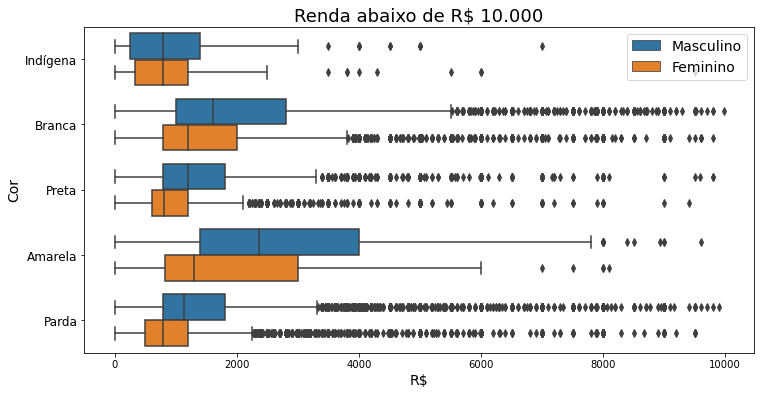

In [196]:

selecao = (dados.Renda < 10000)
box_de_ate_10 = dados[selecao]


ax = sns.boxplot(x = 'Renda', y= 'Cor',
                 data = box_de_ate_10,
                 hue = 'Sexo',  orient = 'h')
ax.figure.set_size_inches(12,6)   # Tamanho da figura
ax.set_title('Renda abaixo de R$ 10.000',
             fontsize = 18)   # Configurando título do gráfico
ax.set_xlabel('R$', fontsize = 14)   # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize = 14) # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'],
                   fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 14)

ax


<li>Estamos analisando o percentual de indivíduos que possuem renda igual ou inferior a <strong>788,00</strong> em relação ao total de observações. O resultado é apresentado como uma porcentagem.</li>

In [32]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
percentual

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?


In [33]:
dados['Renda'].quantile(0.99)

15000.0

<p>Vamos realizar uma análise de dados a partir da tabela dados, apresentando informações sobre a média, mediana, valor máximo e desvio padrão da renda de indivíduos de diferentes gêneros e anos de estudo. A análise é dividida por cor/raça e apresentada por meio de tabelas de frequência e porcentagens, gráficos de boxplot e crosstabs. O objetivo é obter informações sobre a distribuição de renda de diferentes grupos e suas relações com variáveis como gênero, cor/raça e anos de estudo.</p>

In [44]:
anos_estudos = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc = ['mean',
                                                                           'median',
                                                                           'max',
                                                                           'std'],
                           values = dados.Renda)
anos_estudos.rename(index = anos_de_estudo, inplace = True)
anos_estudos.rename(columns = sexo, inplace = True)
anos_estudos

mean                 median           \
Sexo                              Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   799.494638   516.201748       700      390   
1 ano                            895.629047   492.771987       788      400   
2 anos                           931.178986   529.911638       788      450   
3 anos                          1109.203862   546.853916       800      500   
4 anos                          1302.329283   704.279111      1000      788   
5 anos                          1338.653218   781.389776      1045      788   
6 anos                          1448.875419   833.732824      1200      788   
7 anos                          1465.497940   830.751004      1200      788   
8 anos                          1639.396667   933.615351      1300      800   
9 anos                          1508.038850   868.021700      1200      788   
10 anos                         1731.270847   925.919225      1218      800   
11 anos                         2117.060504  1286.790889      1500     1000   
12 anos                         2470.330776  1682.313725      1800     1200   
13 anos                         3195.099154  1911.730047      2400     1300   
14 anos                         3706.620269  2226.460457      2500     1600   
15 anos ou mais                 6134.279790  3899.513231      4000     2800   
Não determinados                1295.761905   798.174419      1200      788   

                                     max                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     30000    10000  1023.904884   639.311534  
1 ano                              30000     2000  1331.950552   425.291842  
2 anos                             40000     4000  1435.173827   498.234168  
3 anos                             80000     3500  2143.800133   424.124446  
4 anos                             50000    10000  1419.821787   629.553397  
5 anos                             35000     8000  1484.650587   635.782641  
6 anos                             25000     6000  1476.628602   574.547028  
7 anos                             40000     9000  1419.708673   602.038029  
8 anos                             30000    18000  1515.583715   896.781213  
9 anos                             60000    20000  2137.664774   973.221652  
10 anos                            45000     6000  2078.609734   620.611907  
11 anos                           200000   100000  2676.538942  1819.040417  
12 anos                            30000   120000  2268.081538  4851.833513  
13 anos                            25000    20000  2797.116800  2053.789771  
14 anos                            50000    20000  3987.214974  2064.083336  
15 anos ou mais                   200000   100000  7447.613594  4212.770709  
Não determinados                    7000     3000   979.648745   459.985964

<p>Criando um gráfico box-plot que analisa a renda por sexo e anos de estudo de indivíduos com idade igual a 50 anos e renda inferior a R$ 10.000. A figura apresenta a mediana, os quartis, e os valores mínimo e máximo para cada categoria, separados por sexo. Além disso, a legenda indica qual cor representa cada sexo. O eixo X indica a renda e o eixo Y, o número de anos de estudo.</p>

<AxesSubplot:title={'center':'Box-Plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='RENDA', ylabel='Anos de Estudo'>

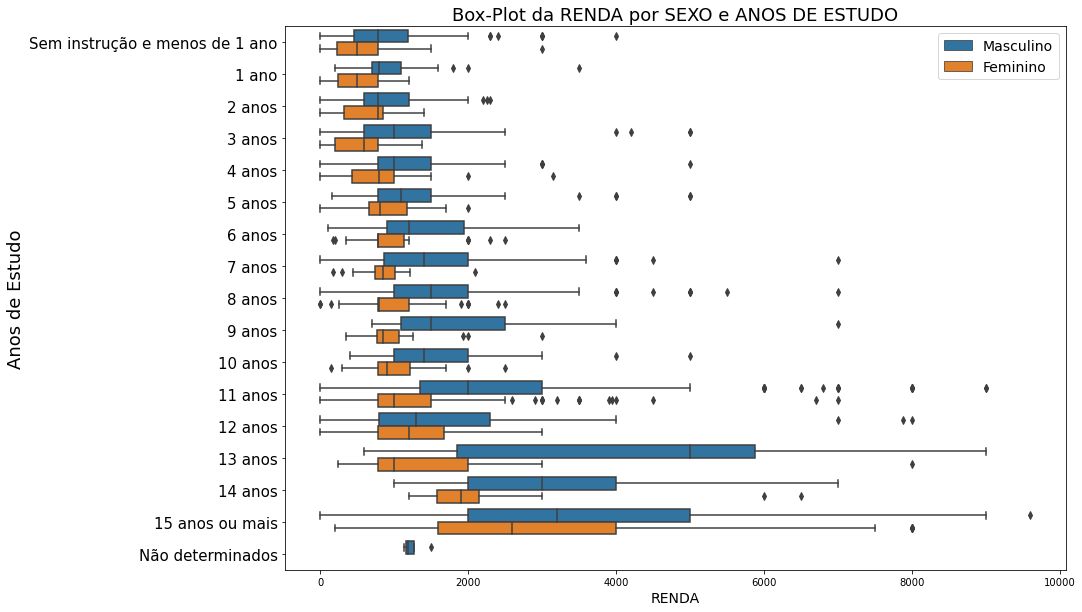

In [52]:
ax = sns.boxplot(x = 'Renda',
               y = 'Anos de Estudo',
               hue = 'Sexo',
               data = dados.query('Renda < 10000 and Idade == 50'),
               orient = 'h')

ax.figure.set_size_inches(14,10)

ax.set_title('Box-Plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize = 18)

ax.set_xlabel('RENDA', fontsize = 14)
ax.set_ylabel('Anos de Estudo', fontsize = 18)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 15)

handles, _ = ax.get_legend_handles_labels()

ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 14)

ax

### Obtendo a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO


In [201]:
# modo 1 de visualizar usando a função GROUPBY().AGG({})

report_20230223 = dados.groupby('UF').agg({'Renda':['mean', 'median', 'max', 'std']})
report_20230223.rename(index = uf, inplace = True)
report_20230223.head()

Renda                            
                 mean  median    max          std
UF                                               
Rondônia  1789.761223  1200.0  50000  2406.161161
Acre      1506.091782   900.0  30000  2276.233415
Amazonas  1445.130100   900.0  22000  1757.935591
Roraima   1783.588889  1000.0  20000  2079.659238
Pará      1399.076871   850.0  50000  2053.779555

In [202]:
# modo 2 de visualizar usando a função CROSSTAB e AGGFUNC[]

report_20230224 = pd.crosstab(dados.UF, dados.Sexo,
                              aggfunc = ['mean','median', 'max', 'std'],
                              values = dados['Renda'])
report_20230224.rename(index = uf, columns = sexo, inplace = True)
report_20230224.round(2)

mean             median                max           \
Sexo                Masculino Feminino Masculino Feminino Masculino Feminino   
UF                                                                             
Rondônia              1921.21  1414.85    1300.0   1000.0     50000    12500   
Acre                  1635.34  1128.62    1000.0    788.0     30000    15000   
Amazonas              1539.99  1235.83    1000.0    800.0     22000    15000   
Roraima               1875.79  1608.11    1125.0    875.0     20000    18000   
Pará                  1509.74  1131.88     980.0    788.0     50000    16000   
Amapá                 1930.40  1736.16    1337.5    920.0     15000    15580   
Tocantins             1912.51  1381.80    1100.0    788.0     60000     9000   
Maranhão              1165.17   723.75     788.0    480.0     30000     8500   
Piauí                 1146.71   899.86     788.0    600.0     40000    30000   
Ceará                 1341.62  1085.80     800.0    788.0     25000    24000   
Rio Grande do Norte   1459.05  1080.68     820.0    788.0     15500    12000   
Paraíba               1364.99  1119.70     800.0    788.0     30000    12200   
Pernambuco            1664.93  1252.24    1000.0    788.0     50000    30000   
Alagoas               1157.75  1105.47     788.0    788.0     10000    11000   
Sergipe               1205.57   877.15     800.0    665.0     16000    10000   
Bahia                 1557.50  1175.02     900.0    788.0    200000    30000   
Minas Gerais          2283.16  1489.62    1400.0    900.0    100000    30000   
Espírito Santo        2129.32  1752.71    1500.0    927.0     40000   100000   
Rio de Janeiro        2777.55  1971.53    1510.0   1040.5    200000   120000   
São Paulo             2947.74  1950.18    1820.0   1200.0     80000    50000   
Paraná                2767.43  1796.26    1800.0   1200.0    200000    25000   
Santa Catarina        2688.30  1792.11    2000.0   1283.5     80000    13000   
Rio Grande do Sul     2488.39  1960.85    1600.0   1200.0     35000    25000   
Mato Grosso do Sul    2603.48  1519.89    1600.0    988.0     42000    25000   
Mato Grosso           2335.35  1604.29    1576.0   1000.0     35000    20000   
Goiás                 2222.63  1339.38    1500.0    900.0     30000    26000   
Distrito Federal      4863.37  3269.88    2500.0   1500.0    100000    30000   

                          std           
Sexo                Masculino Feminino  
UF                                      
Rondônia              2644.12  1476.69  
Acre                  2493.55  1405.46  
Amazonas              1878.40  1436.59  
Roraima               2138.13  1957.18  
Pará                  2209.08  1587.78  
Amapá                 1984.40  2084.58  
Tocantins             3291.59  1516.37  
Maranhão              2186.97   981.79  
Piauí                 2485.36  2070.23  
Ceará                 1842.21  1770.04  
Rio Grande do Norte   1764.86  1320.50  
Paraíba               2030.74  1730.08  
Pernambuco            2565.96  1964.27  
Alagoas               1250.91  1200.22  
Sergipe               1591.04  1135.09  
Bahia                 4070.04  1930.92  
Minas Gerais          3952.09  2341.42  
Espírito Santo        2637.16  5160.62  
Rio de Janeiro        5562.92  4446.61  
São Paulo             3748.02  2767.42  
Paraná                4850.76  2249.06  
Santa Catarina        3447.90  1693.54  
Rio Grande do Sul     3049.80  2576.79  
Mato Grosso do Sul    3324.35  2083.73  
Mato Grosso           2760.47  1765.82  
Goiás                 2382.05  1497.90  
Distrito Federal      6243.91  4061.46

### Nessa análise, vamos plotar um gráfico de boxplot que mostra a distribuição da renda dos indivíduos de diferentes unidades da federação. A seleção é feita apenas para rendas menores do que 10.000 reais.
<br>
<li>O objetivo dessa análise é identificar diferenças na distribuição de renda entre as unidades da federação, permitindo comparações entre elas. Essa informação pode ser utilizada, por exemplo, para entender melhor as desigualdades socioeconômicas entre as regiões do país e orientar políticas públicas para reduzir essas desigualdades.</li>

<AxesSubplot:title={'center':' RENDA segundo as UNIDADES DA FEDERAÇÃO'}, xlabel='Renda', ylabel='UF'>

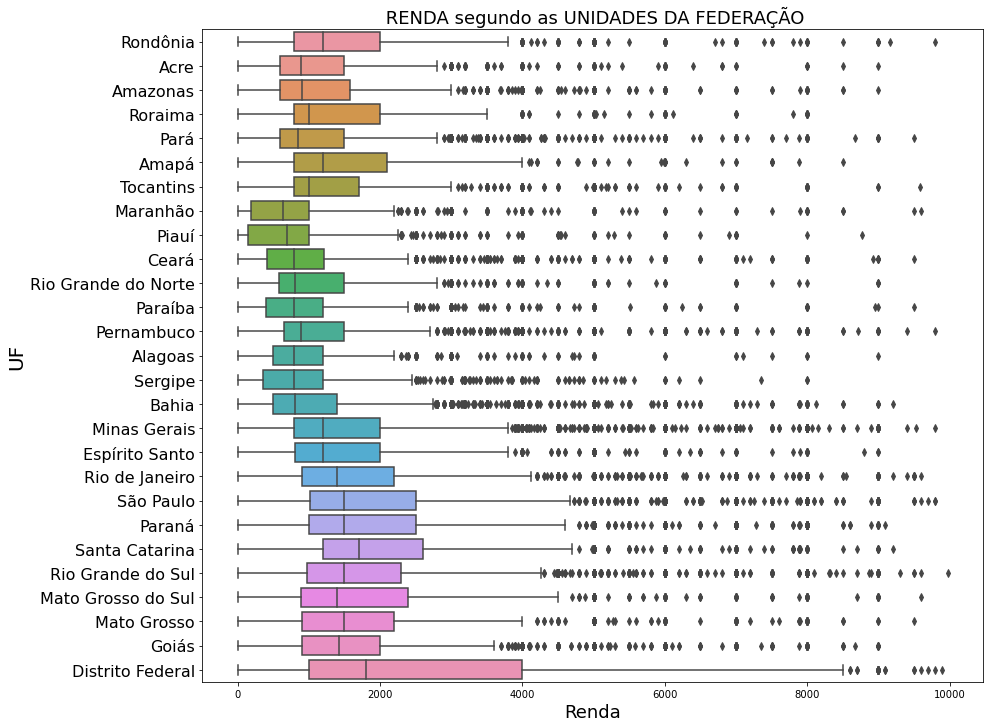

In [203]:
selecao1 = (dados['Renda'] < 10000) 
report_renda_filter_20230223 = dados[selecao1]

ax = sns.boxplot(x = 'Renda',
                 y = 'UF',
                 data = report_renda_filter_20230223,
                 orient = 'h')
ax.figure.set_size_inches(14,12)
ax.set_title(' RENDA segundo as UNIDADES DA FEDERAÇÃO',fontsize = 18)
ax.set_xlabel('Renda',fontsize = 18)
ax.set_ylabel('UF', fontsize = 20)
ax.set_yticklabels([key for key in uf.values()], fontsize = 16)
ax